# SHAP-IQ with scikit-learn

In this example, we use the popular California housing dataset for regression available at https://www.kaggle.com/datasets/camnugent/california-housing-prices.

### import packages

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import shapiq

shapiq.__version__

'0.1.0'

### load data

In [2]:
X, y = shapiq.load_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.25, random_state=42
)
n_features = X_train.shape[1]

### train a model

In [3]:
model = RandomForestRegressor(
    n_estimators=500, max_depth=n_features, max_features=2 / 3, max_samples=2 / 3, random_state=42
)
model.fit(X_train, y_train)
print("Train R2: {:.4f}".format(model.score(X_train, y_train)))
print("Test  R2: {:.4f}".format(model.score(X_test, y_test)))

Train R2: 0.7990
Test  R2: 0.7462


### model-agnostic explainer

We use `shapiq.TabularExplainer` to explain any machine learning model for tabular data. 

It has the following basic parameters:

- `model`: The model to be explained as a callable function expecting data points as input and returning 1-dimensional predictions.

- `data`: A background dataset to be used for imputation.

In [4]:
explainer_tabular = shapiq.TabularExplainer(model=model, data=X_train, index="SII", max_order=2)

Next, select an instance to be explained.

In [5]:
x = X_test[24]

Call an `explain()` interface setting the `budget`, i.e. the maximum number of model evaluations (coallitions).

In [6]:
interaction_values = explainer_tabular.explain(x, budget=2**n_features, random_state=0)
interaction_values

InteractionValues(
    index=SII, max_order=2, min_order=0, estimated=False, estimation_budget=256,
    n_players=8, baseline_value=2.0699756848160713
)

An output is stored in the `shapiq.InteractionValues` object. Its main attribute is `dict_values` storing Shapley interaction values as a dictionary.

In [7]:
interaction_values.dict_values

{(): -0.07380768892240597,
 (0,): 0.05369733857250917,
 (1,): -0.08412275302812369,
 (2,): -0.016713778896017537,
 (3,): 0.023227262169135558,
 (4,): 0.04958763066431334,
 (5,): -0.1433218444275124,
 (6,): 0.17412312948332126,
 (7,): -0.2902617948890109,
 (0, 1): -0.034893774782147405,
 (0, 2): -0.026541122332378597,
 (0, 3): -0.01871038770774595,
 (0, 4): -0.071367126661611,
 (0, 5): -0.07812674942147983,
 (0, 6): -0.10955166148385163,
 (0, 7): 0.019854483384201278,
 (1, 2): 0.04357426938392083,
 (1, 3): -0.01676386269885972,
 (1, 4): -0.017574452395081968,
 (1, 5): 0.08536233924318455,
 (1, 6): -0.01579158605076793,
 (1, 7): 0.01970986212982153,
 (2, 3): -0.04687586237351941,
 (2, 4): -0.03841114440424865,
 (2, 5): 0.0010275343956110269,
 (2, 6): -0.024958767434998717,
 (2, 7): -0.0006766580355046816,
 (3, 4): -0.04218999942273718,
 (3, 5): -0.03229004676457001,
 (3, 6): -0.035638379624015795,
 (3, 7): -0.024113246565429236,
 (4, 5): -0.05170325533724919,
 (4, 6): -0.0193844648132893

One can retrieve only 2-order values with `get_n_order(2)` (object) and `get_n_order_values(2)` (values themselves).

In [8]:
interaction_values.get_n_order(2).dict_values

{(0, 1): -0.034893774782147405,
 (0, 2): -0.026541122332378597,
 (0, 3): -0.01871038770774595,
 (0, 4): -0.071367126661611,
 (0, 5): -0.07812674942147983,
 (0, 6): -0.10955166148385163,
 (0, 7): 0.019854483384201278,
 (1, 2): 0.04357426938392083,
 (1, 3): -0.01676386269885972,
 (1, 4): -0.017574452395081968,
 (1, 5): 0.08536233924318455,
 (1, 6): -0.01579158605076793,
 (1, 7): 0.01970986212982153,
 (2, 3): -0.04687586237351941,
 (2, 4): -0.03841114440424865,
 (2, 5): 0.0010275343956110269,
 (2, 6): -0.024958767434998717,
 (2, 7): -0.0006766580355046816,
 (3, 4): -0.04218999942273718,
 (3, 5): -0.03229004676457001,
 (3, 6): -0.035638379624015795,
 (3, 7): -0.024113246565429236,
 (4, 5): -0.05170325533724919,
 (4, 6): -0.019384464813289388,
 (4, 7): -0.023813296891787447,
 (5, 6): -0.006546855549452841,
 (5, 7): 0.02034666624316624,
 (6, 7): -0.028007763665159613}

In [9]:
interaction_values.get_n_order_values(2)

array([[ 0.05369734, -0.03489377, -0.02654112, -0.01871039, -0.07136713,
        -0.07812675, -0.10955166,  0.01985448],
       [-0.03489377, -0.08412275,  0.04357427, -0.01676386, -0.01757445,
         0.08536234, -0.01579159,  0.01970986],
       [-0.02654112,  0.04357427, -0.01671378, -0.04687586, -0.03841114,
         0.00102753, -0.02495877, -0.00067666],
       [-0.01871039, -0.01676386, -0.04687586,  0.02322726, -0.04219   ,
        -0.03229005, -0.03563838, -0.02411325],
       [-0.07136713, -0.01757445, -0.03841114, -0.04219   ,  0.04958763,
        -0.05170326, -0.01938446, -0.0238133 ],
       [-0.07812675,  0.08536234,  0.00102753, -0.03229005, -0.05170326,
        -0.14332184, -0.00654686,  0.02034667],
       [-0.10955166, -0.01579159, -0.02495877, -0.03563838, -0.01938446,
        -0.00654686,  0.17412313, -0.02800776],
       [ 0.01985448,  0.01970986, -0.00067666, -0.02411325, -0.0238133 ,
         0.02034667, -0.02800776, -0.29026179]])

### visualization of Shapley interactions

`shapiq` includes the following plotting functions:

- [network_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.network_plot)

- [stacked_bar_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.stacked_bar_plot)

- [force_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.force_plot)

- and [bar_plot()](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html#shapiq.plot.bar_plot) for global feature (interaction) importance.

For details of their parameters, refer to the [API reference](https://shapiq.readthedocs.io/en/latest/api/shapiq.plot.html).

(<Figure size 600x600 with 1 Axes>, <Axes: >)

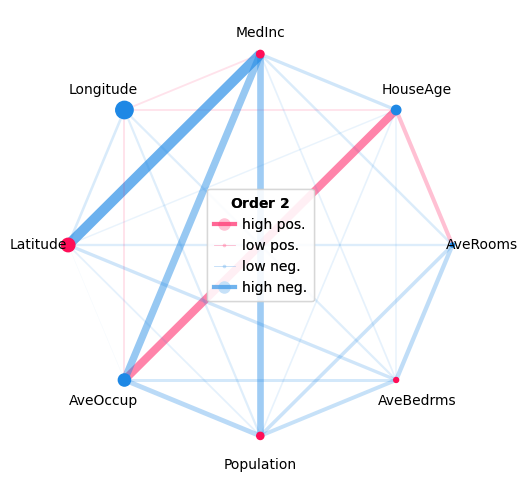

In [10]:
shapiq.network_plot(
    first_order_values=interaction_values.get_n_order_values(1),
    second_order_values=interaction_values.get_n_order_values(2),
    feature_names=X.columns,
)

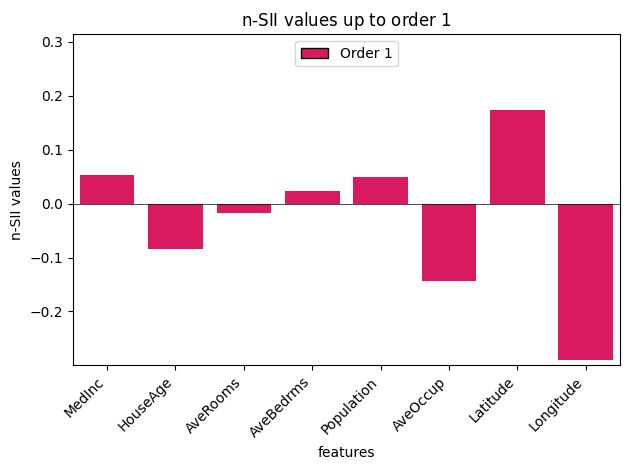

In [11]:
_ = shapiq.stacked_bar_plot(
    n_shapley_values_pos={
        1: np.array([0 if x < 0 else x for x in interaction_values.get_n_order_values(1)])
    },
    n_shapley_values_neg={
        1: np.array([0 if x > 0 else x for x in interaction_values.get_n_order_values(1)])
    },
    feature_names=X.columns,
)

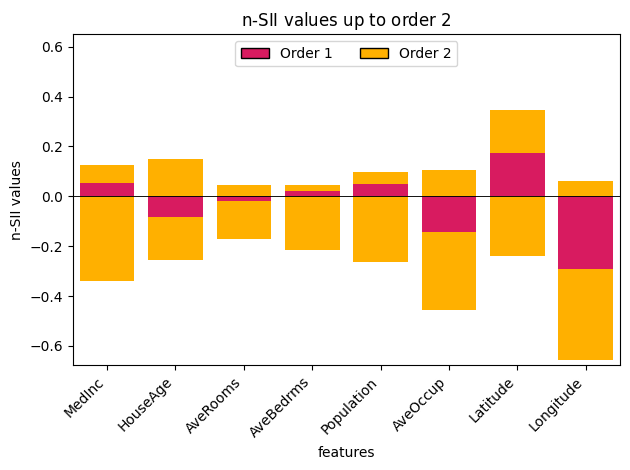

In [12]:
_ = shapiq.stacked_bar_plot(
    n_shapley_values_pos={
        1: np.array([0 if x < 0 else x for x in interaction_values.get_n_order_values(1)]),
        2: interaction_values.get_n_order_values(2).clip(min=0).sum(axis=0),
    },
    n_shapley_values_neg={
        1: np.array([0 if x > 0 else x for x in interaction_values.get_n_order_values(1)]),
        2: interaction_values.get_n_order_values(2).clip(max=0).sum(axis=0),
    },
    feature_names=X.columns,
    n_sii_max_order=2,
)

After installing the `shap` Python package.

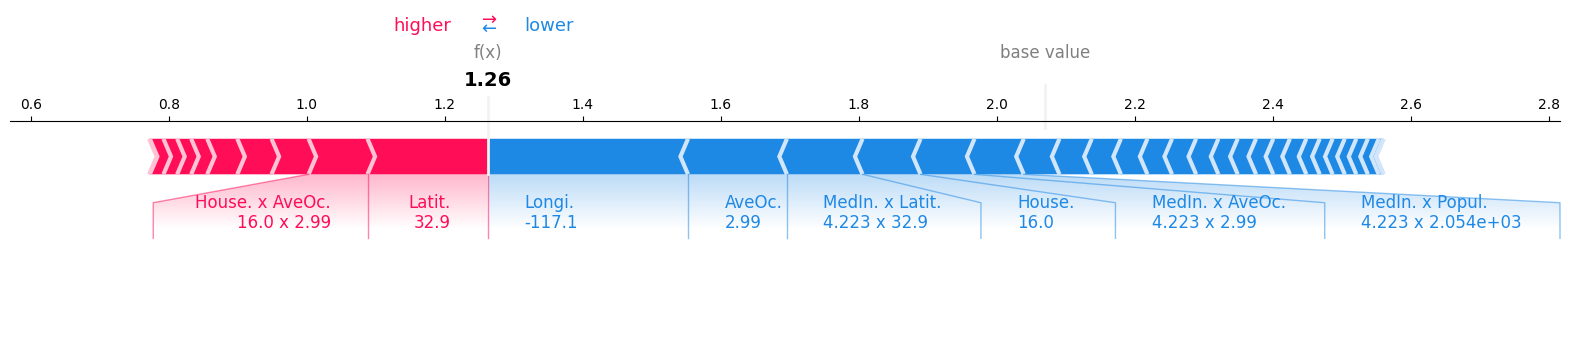

In [13]:
interaction_values.plot_force(feature_names=X.columns, feature_values=x)